# Réduction des dimensions

De nombreux problèmes d'apprentissage machine impliquent des **milliers**, voire des **millions** de variables explicatives pour chaque ensemble de données d’entraînement. Non seulement cela rend la phase d’entraînement du modèle extrêmement lente, mais cela peut aussi rendre beaucoup plus difficile la recherche d'une bonne solution.

Heureusenemnt, il existe des techniques de réduction de dimensions qui nous permettent de traiter ces données impliquant des millions de variables. Avant de plonger dans la réduction des dimensions, regardons quelques exemples de données dont l'aspect des dimensions est important.

## Exemple des images

Il est souvent possible de réduire considérablement le nombre de variables explicatives. Prenons par exemple les images du MNIST {cite}`lecun1998gradient` qui est un ensemble de 70 000 petites images de chiffres manuscrits par des collégiens et des employés du Bureau du recensement américain. Chaque image est étiquetée avec le chiffre qu'elle représente. 

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

import matplotlib.pyplot as plt
%matplotlib inline

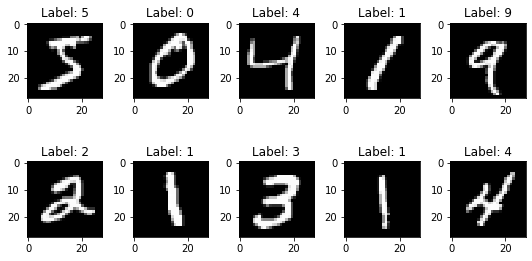

In [3]:
num = 10
images = X_train[:num]
labels = Y_train[:num]

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

Les pixels de l'image sont presque toujours blancs (ou noir en contrast), ce qui permet de les supprimer complètement du jeu d'entraînement sans perdre beaucoup d'informations. Les pixels ne sont absolument pas importants pour la tâche de classification. De plus, deux pixels voisins sont souvent fortement corrélés : si vous les fusionnez en un seul pixel (par exemple en prenant la moyenne des intensités des deux pixels), vous ne perdrez pas beaucoup d'informations.

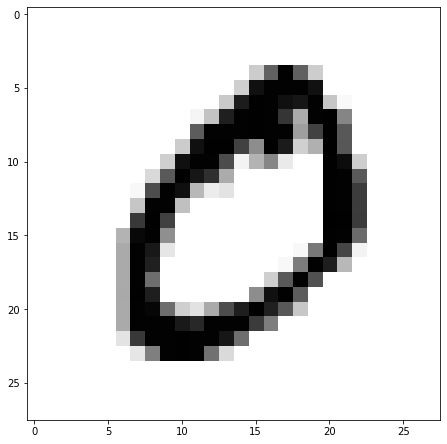

In [3]:
sample = 1
image = X_train[sample]# plot the sample
fig = plt.figure(figsize=(12, 7.6))
plt.imshow(image, cmap='gray_r')
plt.show()

Dans le cas des de classification des images, la réduction de la dimensionnalité fait perdre certaines informations, donc même si elle accélère la phase d’entraînement du modèle, elle peut aussi rendre votre modèle légèrement moins performant.

Cela rend également vos _pipeline_ un peu plus complexes et donc plus difficiles à entretenir. Vous devez donc d'abord essayer d'entraîner votre modèle avec les données originales avant d'envisager d'utiliser la réduction de la dimensionnalité.

## Très haute dimensions

Nous pouvons faire face des fois à des défis de "taille", comme la taille des images de très hautes résolution. En effet, certains images nous sont des fois remis avec un très haute résolution. Dans l'exemple ci-dessous, nous avons l'image de l'herbacé Amarante réfléchie [Amaranthus retroflexus](https://fr.wikipedia.org/wiki/Amarante_r%C3%A9fl%C3%A9chie);

<img src="https://www.idseed.org/seedidguide/public/uploads/gallery_photo/resize_5db9f50308ae1.jpg" alt="grad_desc_2" class="responsive" width="60%"  class="center">


Si l'on compare cette graine à celle de l'amarante épineuse [(Amaranthus spinosus)](https://fr.wikipedia.org/wiki/Amaranthus_spinosus), on peut voir que ces deux se ressemblent énormément;

<img src="https://www.idseed.org/seedidguide/public/uploads/gallery_photo/resize_5db9f8a62aad5.jpg" alt="grad_desc_2" class="responsive" width="60%"  class="center">

Dans d'autres cas, nous avons des images avec plusieurs couches afin de reprodit un effet 3D, cela rend encore les images extrêment en très haute résolution. Dans l'exemple ci-dessous, nous avons une résolution 5000x2000 pixels.

<img src="https://www.idseed.org/seedidguide/public/uploads/gallery_photo/Amaranthus_rudis.gif" alt="grad_desc_2" class="responsive" width="60%"  class="center">

Or, appliquer une réduction de dimension dans de tels problèmes risque de réduire énormément le taux de justesse du modèle de classification. 

## Exemple d'imagerie spectrale

Certains détails dans les images RGB que nous appercevons avec notre oeil peuvent manquer beaucoup de détail. Par exemple {cite}`bianchini2021multispectral` démontre l'importance et la haute performance de l'imagerie spectrale comme outil rapide et polyvalent pour évaluer les attributs de la germination des graines.

![](https://videometer.com/Portals/1/LiveBlog/664/oilseed.jpg?ver=wqhfeKks833muzIxFQWCAQ%3d%3d)

Dans un article récent {cite}`li2020discrimination`, un groupe de recherche chinois montre que trois variétés de graines de poivron peuvent être distinguées des images spectrales avec une précision de classification de plus de 97 %. Les classificateurs SVM, CNN et kNN ont été utilisés et comparés. Les tests de pureté génétique rapides et non destructifs ont un potentiel énorme dans l'industrie des semences et cet article montre l'importance de l'imagerie spectrale pour l'analyse des semences dans une autre culture importante.

## La dimensionnalité

Pour nous (les humains), il est extrement difficile (voir impossible) d'imaginer un monde au delà de $d>3$ dimensions. Habituellement, le mieux que nous puissions faire est de penser aux géométries à haute dimension par l'algèbre linéaire : les équations qui régissent notre compréhension des géométries à deux/trois dimensions se généralisent facilement pour un $d$ arbitraire, et c'est ainsi que les choses fonctionnent.

Nous pouvons développer une certaine intuition sur comment travailler avec un ensemble de données à plus haute dimension par des méthodes de projection, qui réduisent la dimensionnalité à des niveaux que nous pouvons comprendre. Il est souvent utile de visualiser les projections bidimensionnelles des données en ignorant entièrement les autres dimensions $d-2$, et d'étudier plutôt les tracés en points des paires de dimensions. Grâce à des méthodes de réduction des dimensions telles que l'analyse par composante principale (voir les prochaines sections), nous pouvons combiner des caractéristiques fortement corrélées pour produire une représentation plus nette. Bien entendu, certains détails sont perdus au cours du processus.

Il doit être clair qu'en augmentant le nombre de dimensions dans notre ensemble de données, nous disons implicitement que chaque dimension est une partie moins importante de l'ensemble. En mesurant la distance entre deux points dans l'espace des caractéristiques, comprenez qu'un grand $d$ signifie qu'il y a plus de façons pour les points d'être proches (ou éloignés) les uns des autres : nous pouvons imaginer qu'ils sont presque identiques dans toutes les dimensions sauf une.

C'est pourquoi le choix de la mesure de la distance est le plus important dans les espaces de données à haute dimension. Bien sûr, nous pouvons toujours nous en tenir à la distance $L_2$, qui est un choix sûr et standard. Mais si nous voulons récompenser les points pour être proches sur de nombreuses dimensions, nous préférons une métrique qui penche davantage vers $L_1$. Si, au contraire, les choses sont similaires alors qu'il n'y a pas de champs uniques de dissimilitude flagrante, nous devrions peut-être nous intéresser à quelque chose de plus proche de $L_{\infty}$.

Avant de nous plonger dans des algorithmes spécifiques de réduction de la dimensionnalité, examinons la principale approche de réduction de la dimensionnalité : la **projection**.

## Projection

Dans la plupart des problèmes, les observations ne sont pas réparties uniformément dans toutes les dimensions. De nombreuses caractéristiques sont presque constantes, tandis que d'autres sont fortement corrélées. Par conséquent, toutes les instances d'entraînement se trouvent en fait dans (ou à proximité de) un sous-espace de dimension beaucoup plus bas de l'espace de haute dimension. Regardons un exemple où l'on peut voir un ensemble de données 3D représenté par les cercles.

In [99]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Transformer le plan en fonction de $x$ et $y$.

In [100]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [101]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [102]:
X3D_inv = pca.inverse_transform(X2D)

In [103]:

axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

Tracez le jeu de données 3D, le plan et les projections sur ce plan.

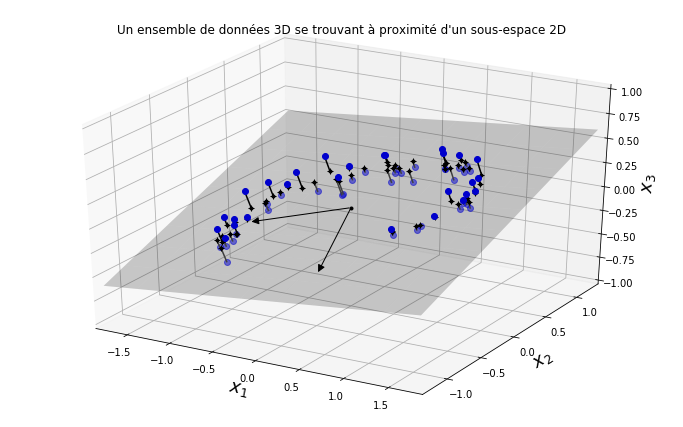

In [104]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 7.6))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_title("Un ensemble de données 3D se trouvant à proximité d'un sous-espace 2D")
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [105]:
print(pca.explained_variance_ratio_)

[0.84248607 0.14631839]


In [7]:
0.84248607 + 0.14631839

0.98880446

Si nous projetons chaque observation perpendiculairement à ce sous-espace (comme représenté par les lignes courtes reliant les observations de l'hyperplan), nous obtenons le nouvel ensemble de données 2D illustré à la figure ci-dessous.Nous venons de réduire la dimension de l'ensemble de données de 3D à 2D. Notez que les axes correspondent aux nouvelles variables $z_{1}$ et $z_{2}$ (les coordonnées des projections sur le plan).

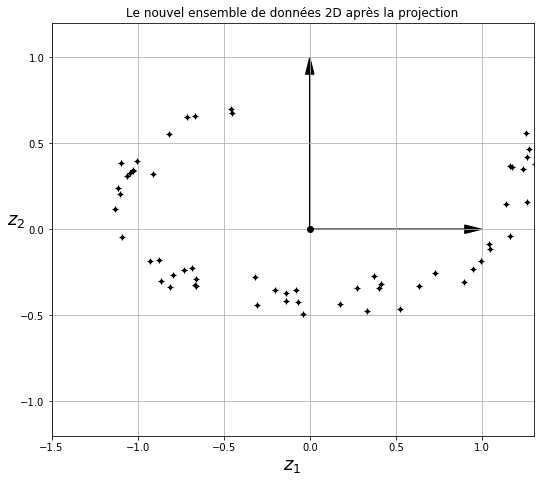

In [76]:
fig = plt.figure(figsize=(12, 7.6))
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.set_title("Le nouvel ensemble de données 2D après la projection")
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

Cependant, la projection n'est pas toujours la meilleure approche pour réduire la dimensionnalité. Dans de nombreux cas, le sous-espace peut prendre différentes formes, comme dans le célèbre ensemble de données sur des [jouets roulants suisses](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html) représenté dans la figure ci-dessous

In [9]:
import plotly.offline as plyo
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plyo.init_notebook_mode(connected=True)

import plotly
from IPython.core.display import display, HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [78]:
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

In [80]:
X, color = datasets.make_swiss_roll(n_samples=1500)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 1.1293e-07


In [93]:
try:
    p1 = plotly.graph_objs.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],
                      mode='markers', 
                      marker=dict(color=color, 
#                                   colorscale=cmap,
                                  showscale=False,
                                  line=dict(color='black', width=1)))

except:
    p1 = plotly.graph_objs.Scatter(x=X[:, 0], y=X[:, 2], 
                    mode='markers', 
                    marker=dict(color=color, 
#                                 colorscale=cmap,
                                showscale=False,
                                line=dict(color='black', width=1)))

layout=dict(title='Original Data',
            
            margin=dict(l=10, r=10,
                        t=30, b=10)
           )
fig = plotly.graph_objs.Figure(data=[p1], layout=layout)


In [ ]:
plot(fig, filename = 'exemple_3dscat.html');

In [106]:
display(HTML('exemple_3dscat.html'))

Une simple projection sur un plan (par exemple, en laissant tomber l'axe $z$) écraserait différentes couches du rouleau suisse ensemble. Cependant, ce que vous voulez vraiment, c'est dérouler le rouleau suisse pour obtenir l'ensemble de données en 2D comme le montre la figure ci-dessous.

In [97]:
p2 = plotly.graph_objs.Scatter(x=X_r[:, 0], y=X_r[:, 1], 
                mode='markers', 
                marker=dict(color=color, 
#                             colorscale=cmap,
                            showscale=False,
                            line=dict(color='black', width=1)))
layout=dict(title='Projected Data',
            xaxis=dict(zeroline=False, showgrid=False),
            yaxis=dict(zeroline=False, showgrid=False),
           )
fig = plotly.graph_objs.Figure(data=[p2], layout=layout)

In [ ]:
plot(fig, filename = 'exemple_project.html');

In [13]:
display(HTML('exemple_project.html'))

```{bibliography} ../references_data.bib
:filter: docname in docnames
```